<a href="https://colab.research.google.com/github/souro/misc_google_collab/blob/main/wiki_honorifics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://dumps.wikimedia.org/{iso_lang_code}wiki/latest/{iso_lang_code}wiki-latest-pages-articles.xml.bz2
#python -m wikiextractor.WikiExtractor Downloads/hiwiki-latest-pages-articles.xml.bz2 --json -o hi_wiki_json
#python -m wikiextractor.WikiExtractor {iso_lang_code}wiki/latest/{iso_lang_code}wiki-latest-pages-articles.xml.bz2 --html-safe HTML_SAFE -o {iso_lang_code}_clean_data/

In [23]:
import json
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# def is_unicode_format(value):
#     return bool(re.search(r'\\u[0-9A-Fa-f]{4}', value))

In [12]:
# def convert_to_readable_text(value):
#     return value.encode().decode('unicode_escape')

In [ ]:
# def process_json_object(json_obj):
#     for key, value in json_obj.items():
#         if isinstance(value, str) and is_unicode_format(value):
#             json_obj[key] = convert_to_readable_text(value)
#         elif isinstance(value, dict):
#             process_json_object(value)
#         elif isinstance(value, list):
#             for item in value:
#                 if isinstance(item, dict):
#                     process_json_object(item)
#     return json_obj

In [ ]:
# input_file = 'sample_data/wiki_00'
# output_file = 'sample_data/wiki_bn1.json'

In [ ]:
# !unzip sample_data/bn_prcsd.zip

In [14]:
input_directory = '/content/drive/MyDrive/Colab Notebooks/AA' #'sample_data/bn/'
# output_directory = 'sample_data/bn_prcsd/'

In [3]:
# input_directory = '/content/drive/MyDrive/Colab Notebooks/bn_wiki_json/' #'sample_data/bn_prcsd/'

In [8]:
bn_pronouns = ["সে", "তারা", "তাঁরা", "ও", "ওরা", "তিনি", "তাহারা", "তার", "তাঁর", "তাদের", "তাঁদের", "ওর", "ওদের", "তাহার", "তাহাদের"]
hi_pronouns = ["वह", "वे", "वो", "उसने", "उसको", "उसे", "उसका", "उसके", "उसकी", "उनका", "उनके", "उनकी", "उनको", "इसका", "इसकी","इसके", "इनका", "इनकी", "इनके", "इनको", "उनसे", "उन्होंने", "उन्हें"]

In [6]:
# def count_pronouns(text, pronouns):
#     counts = {pronoun: text.count(pronoun) for pronoun in pronouns}
#     return counts
def count_pronouns(text, pronouns):
    counts = {}
    for pronoun in pronouns:
        pattern = rf'\b{pronoun}\b'
        counts[pronoun] = len(re.findall(pattern, text))
    return counts

In [ ]:
# data = []
# for filename in os.listdir(input_directory):
#     # if filename.endswith('.json'):
#     filepath = os.path.join(input_directory, filename)
#     input_file = filepath
#     output_file = os.path.join(output_directory, filename)
#     with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
#         for line in infile:
#             json_obj = json.loads(line)

#             title = json_obj.get('title', '')
#             text = json_obj.get('text', '')

#             pronoun_counts = count_pronouns(text, pronouns)
#             pronoun_counts['title'] = title
#             data.append(pronoun_counts)

#             processed_obj = process_json_object(json_obj)
#             json.dump(processed_obj, outfile, ensure_ascii=False)
#             outfile.write('\n')

In [15]:
data = []
for filename in os.listdir(input_directory):
    # if filename.endswith('.json'):
    filepath = os.path.join(input_directory, filename)
    input_file = filepath
    with open(input_file, 'r', encoding='utf-8') as infile:
      for line in infile:
        if line.strip():
          try:
            # print(line)
            json_obj = json.loads(line)

            title = json_obj.get('title', '')
            text = json_obj.get('text', '')

            pronoun_counts = count_pronouns(text, hi_pronouns)
            pronoun_counts['title'] = title
            data.append(pronoun_counts)
          except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {input_file}, line: {line.strip()}")
            print(e)

In [27]:
# def count_pronouns(text, pronouns):
#     counts = {}
#     for pronoun in pronouns:
#         pattern = rf'\b{pronoun}\b'
#         counts[pronoun] = len(re.findall(pattern, text))
#     return counts
pronouns = hi_pronouns
def extract_sections(text):
    section_pattern = r'\n([^.\n]+)\.\n'
    sections = re.split(section_pattern, text)
    sections_dict = {}

    for i in range(1, len(sections), 2):
        section_name = sections[i].strip()
        section_text = sections[i + 1].strip() if (i + 1) < len(sections) else ''
        sections_dict[section_name] = section_text

    return sections_dict

output_file = 'hi_output.csv' #'bn_output.csv'

data = []

for root, dirs, files in os.walk(input_directory):
    for filename in files:
    # for filename in os.listdir(input_directory):
      # if filename.endswith('.json'):
      filepath = os.path.join(root, filename)

      with open(filepath, 'r', encoding='utf-8') as file:
          for line in file:
              json_obj = json.loads(line)
              title = json_obj.get('title', '')
              text = json_obj.get('text', '')

              sections = extract_sections(text)

              for section_name, section_text in sections.items():
                  pronoun_counts = count_pronouns(section_text, pronouns)
                  pronoun_counts['title'] = f"{title} - {section_name}"
                  data.append(pronoun_counts)

df = pd.DataFrame(data)

for pronoun in pronouns:
    if pronoun not in df.columns:
        df[pronoun] = 0

df = df[['title'] + pronouns]

df.to_csv(output_file, index=False, encoding='utf-8')

In [28]:
df.head()

,title,वह,वे,वो,उसने,उसको,उसे,उसका,उसके,उसकी,...,इसका,इसकी,इसके,इनका,इनकी,इनके,इनको,उनसे,उन्होंने,उन्हें
0,विश्वविद्यालय - इतिहास,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,विश्वविद्यालय - भारत में उच्च-शिक्षा का इतिहास,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,विश्वविद्यालय - विश्वविद्यालयों का प्रशासन,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,विश्वविद्यालय - विभाग एवं उपाधियाँ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,विश्वविद्यालय - समस्याएँ एवं भविष्य,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2

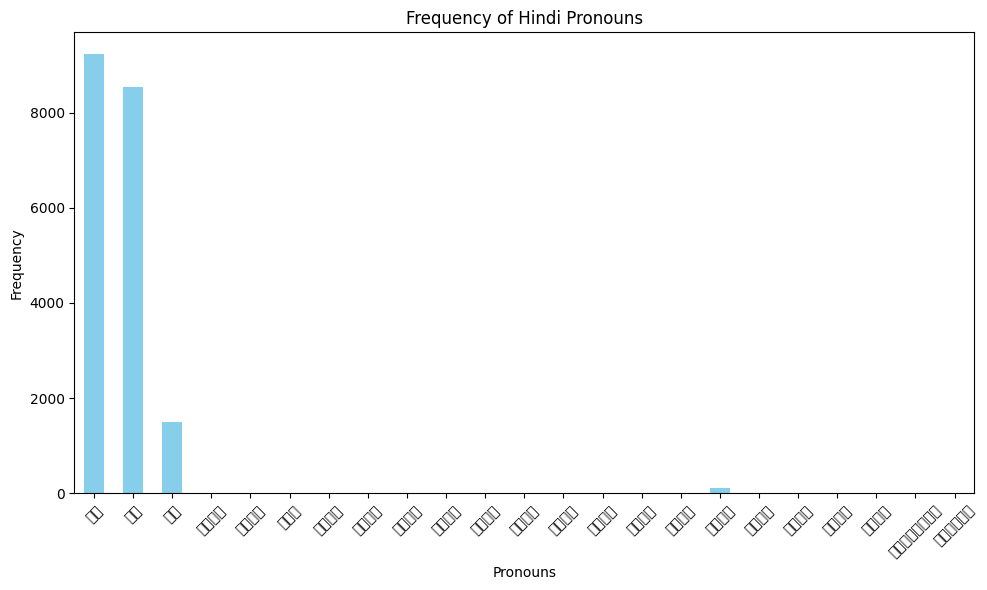

In [22]:
pronoun_frequencies = df.drop(columns=['title']).sum()

plt.figure(figsize=(10, 6))
pronoun_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequency of Hindi Pronouns')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2433 (\N{BENGALI SIGN CANDRABINDU}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2451 (\N{BENG

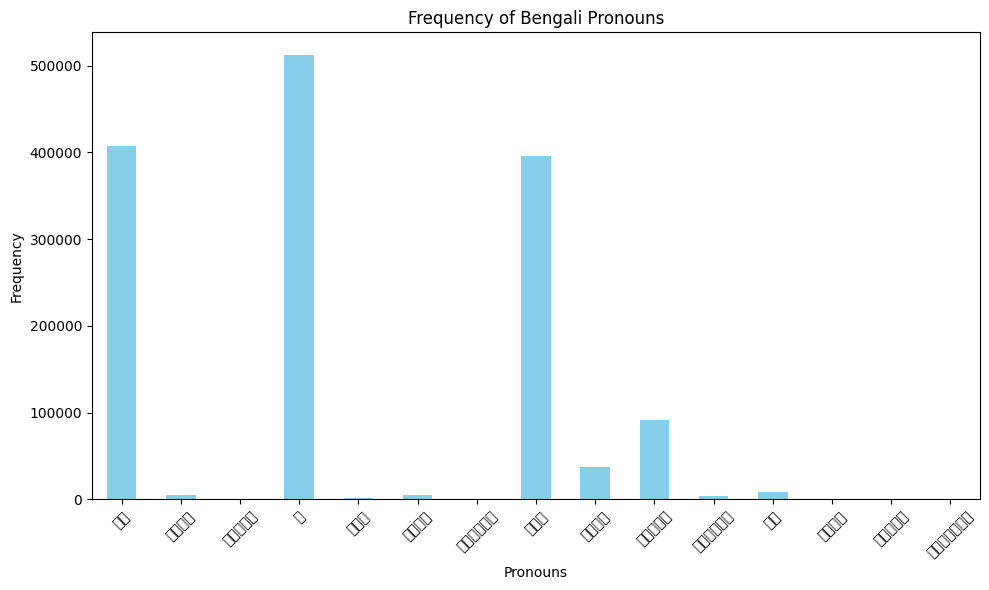

In [24]:
df = pd.read_csv('bn_output.csv')
pronoun_frequencies = df.drop(columns=['title']).sum()

plt.figure(figsize=(10, 6))
pronoun_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequency of Bengali Pronouns')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# !zip -r sample_data/bn_prcsd.zip sample_data/bn_prcsd/

In [16]:
print(data[:5])

[{'वह': 4, 'वे': 2, 'वो': 1, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'विश्वविद्यालय'}, {'वह': 0, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'सिदी'}, {'वह': 0, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'शीदि'}, {'वह': 4, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका':

In [17]:
freq_output_file = 'sample_data/output_hi.csv'

In [18]:
df = pd.DataFrame(data)

for pronoun in hi_pronouns:
    if pronoun not in df.columns:
        df[pronoun] = 0

df = df[['title'] + hi_pronouns]

df.to_csv(freq_output_file, index=False, encoding='utf-8')

In [19]:
df.head()

,title,वह,वे,वो,उसने,उसको,उसे,उसका,उसके,उसकी,...,इसका,इसकी,इसके,इनका,इनकी,इनके,इनको,उनसे,उन्होंने,उन्हें
0,विश्वविद्यालय,4,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,सिदी,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,शीदि,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,व्यापारी,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,नाविक,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

# # Initialize findspark
# import findspark
# findspark.init()

# # Create a PySpark session
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
# spark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
sample_data	

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [907 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,221 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,396 kB]


In [ ]:
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession

In [ ]:
from pyspark import SparkContext
num_of_th = 48;
repartition_size = num_of_th*4;
chunk_size = 1000000
sc = SparkContext(master = "local[20]").getOrCreate()
spark = SparkSession(sc)

In [ ]:
spark

In [ ]:
!bunzip2 -d sample_data/bnwiki-latest-pages-articles.xml.bz2

bunzip2: Can't open input file sample_data/bnwiki-latest-pages-articles.xml.bz2: No such file or directory.


In [ ]:
file_rdd = spark.read.text("/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml", wholetext=False)

In [ ]:
file_rdd

DataFrame[value: string]

In [ ]:
file_chunk = file_rdd.take(chunk_size)

In [ ]:
file_rdd.take(10)

[Row(value='<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.11/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.11/ http://www.mediawiki.org/xml/export-0.11.xsd" version="0.11" xml:lang="bn">'),
 Row(value='  <siteinfo>'),
 Row(value='    <sitename>উইকিপিডিয়া</sitename>'),
 Row(value='    <dbname>bnwiki</dbname>'),
 Row(value='    <base>https://bn.wikipedia.org/wiki/%E0%A6%AA%E0%A7%8D%E0%A6%B0%E0%A6%A7%E0%A6%BE%E0%A6%A8_%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A6%BE</base>'),
 Row(value='    <generator>MediaWiki 1.43.0-wmf.14</generator>'),
 Row(value='    <case>first-letter</case>'),
 Row(value='    <namespaces>'),
 Row(value='      <namespace key="-2" case="first-letter">মিডিয়া</namespace>'),
 Row(value='      <namespace key="-1" case="first-letter">বিশেষ</namespace>')]

In [ ]:
myRDD = sc.parallelize(file_chunk)

In [ ]:
myRDD_ = myRDD.repartition(repartition_size)

In [ ]:
elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}


def get_values(i,x,elements_parsed):
    try:
        root = ET.fromstring(x[0]) # can be run over multiple threads by increasing batch size
        for child in root.iter():
            if child.tag == "title":
                elements_parsed["title"].append(child.text)
#                 elements_parsed["count"].append(i)
            if child.tag == "url":
                elements_parsed["url"].append(child.text)
            if child.tag == "abstract":
                elements_parsed["abstract"].append(child.text)
            if child.tag == "anchor":
                elements_parsed["anchor"].append(child.text)
            if child.tag == "link":
                elements_parsed["link"].append(child.text)

    except:
      pass
    # gc.collect()
    return elements_parsed

In [ ]:
# Register the parser with Pysaprk
from pyspark.sql.types import StringType
# pyspark.sql.udf.UDFRegistration.register(name="get_values", f = get_values, returnType=StringType())
from pyspark.sql.functions import udf
get_values_udf = udf(get_values, StringType())

In [ ]:
import time
parsed_records_ini = []; start = time.time()

for idx_,count in enumerate(count_list):
    # 6. Getting one partitioned RDD at a time.
    chunk = myRDD.mapPartitionsWithIndex(lambda i, it: islice(it, 0, count) if i == idx_ else []).collect()




    # 7. Parallelizing it further.
    myRDD_ = sc.parallelize(chunk)
    myRDD_ = myRDD_.repartition(repartition_size)

    #Initiate the dict in which elements will be appended
    elements_parsed = {"count" : [], "title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}

    # 7. Run the job on spark
    elements_parsed = sc.runJob(myRDD_, lambda part: [get_values(i,x,elements_parsed) for i,x in enumerate(part)])




    # 8. Remove duplicate and consilation of parsed records, a hygiene check.

    parsed_records_list = elements_parsed_rm_frindges(elements_parsed)

    # 8. Create a master list in which all the cleaned records will continue appending while all the intermediate variables are reset.
    parsed_records = parsed_records_ini+parsed_records_list
    parsed_records_ini = parsed_records


    # Clean the intermediate RDD
    myRDD_ = sc.emptyRDD()

    #Garbage collection to further save up memory
    gc.collect()

    # Clear Spark cache just in case.
    spark.catalog.clearCache()
    print(idx_, time.time()-start)

In [ ]:
import time
import xml.etree.ElementTree as ET

anch = []; lnk = []; start = time.time(); df = pd.DataFrame(); i = 0
elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}



for event, elem in ET.iterparse("/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"):
    if elem.tag == "title":
        elements_parsed["title"].append(elem.text.split(":")[1])

    if elem.tag == "url":
        elements_parsed["url"].append(elem.text)
    if elem.tag == "abstract":
        elements_parsed["abstract"].append(elem.text)

    if len(elem) > 0:
        for child in elem:
            # print("Child tag:", child.tag)
            if child.tag == "anchor":
                anch.append(child.text)

            if child.tag == "link":
                lnk.append(child.text)


    if i > 0 and elem.tag == "title":
        elements_parsed["anchor"].append(anch)
        elements_parsed["link"].append(lnk)
        anch = []; lnk = []
        if len(df) == 0:
            df["title"] = [elements_parsed["title"][0]]
            df["url"] = [elements_parsed["url"][0]]
            df["abstract"] = [elements_parsed["abstract"][0]]
            df["anchor"] = [elements_parsed["anchor"][0]]
            df["link"] = [elements_parsed["link"][0]]
        if len(df) > 0:
            df.loc[i] = [elements_parsed["title"][0],elements_parsed["url"][0],elements_parsed["abstract"][0],elements_parsed["anchor"][0],elements_parsed["link"][0]]

        elements_parsed.clear()
        elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}
        elements_parsed["title"].append(elem.text)


    i = i+1
    if i > 0 and i % 1000000 == 0:#00
        print(i,"Time taken...", time.time()-start, "seconds..")
    if i == 1000000:
        break

In [ ]:
# import xml.etree.ElementTree as ET

# def print_article_tags(xml_file, article_title):
#     found_article = False
#     for event, elem in ET.iterparse(xml_file, events=("start", "end")):
#         if event == "start" and elem.tag == "page":
#             for child in elem:
#                 if child.tag == "title" and child.text == article_title:
#                     found_article = True
#                     break

#         if found_article and event == "end":
#             if elem.tag != "page":
#                 print(f"Tag: {elem.tag}, Value: {elem.text}")

#             if elem.tag == "page":
#                 break
#             elem.clear()

# xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
# article_to_find = "মুজিবুর রহমান"
# print_article_tags(xml_file_path, article_to_find)

In [ ]:
import xml.etree.ElementTree as ET

def print_first_n_pages(xml_file, n):
    page_count = 0
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        if event == "start" and elem.tag == "page":
            page_count += 1

        if page_count <= n and event == "end":
            if elem.tag != "page":
                # print(f"Tag: {elem.tag}, Value: {elem.text}")
                print(f"Tag: {elem.tag}")

            if elem.tag == "page":
                elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
num_articles_to_print = 1
print_first_n_pages(xml_file_path, num_articles_to_print)

In [ ]:
import xml.etree.ElementTree as ET

def print_first_page(xml_file):
    in_page = False
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        if event == "start" and elem.tag == "page":
            in_page = True
            print(1)

        if in_page and event == "end":
            if elem.tag == "page":
                in_page = False
                print(2)
                break
            else:
                print(f"Tag: {elem.tag}, Value: {elem.text}")
                print(3)

        if event == "end" and not in_page:
          print(4)
          elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
print_first_page(xml_file_path)

In [ ]:
# import xml.etree.ElementTree as ET

# def print_first_page(xml_file):
#   in_page = False
#   for event, elem in ET.iterparse(xml_file, events=("start", "end")):
#       print(f"Event: {event}, Tag: {elem.tag}")
#       if event == "start" and elem.tag == "page":
#           print("Starting a page")
#           in_page = True

#       if in_page and event == "end":
#           if elem.tag == "page":
#               print("Ending a page")
#               break
#           else:
#               print(f"Tag: {elem.tag}, Value: {elem.text}")

#       if event == "end" and not in_page:
#           elem.clear()

# xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
# print_first_page(xml_file_path)

import xml.etree.ElementTree as ET

def strip_tag_name(tag):
    return tag.split('}', 1)[1] if '}' in tag else tag

def print_first_page(xml_file):
    in_page = False
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        tag_name = strip_tag_name(elem.tag)
        print(f"Event: {event}, Tag: {tag_name}")

        if event == "start" and tag_name == "page":
            print("Starting a page")
            in_page = True

        if in_page and event == "end":
            if tag_name == "page":
                print("Ending a page")
                break
            else:
                print(f"Tag: {tag_name}, Value: {elem.text}")

        if event == "end" and not in_page:
            elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
print_first_page(xml_file_path)

Event: start, Tag: mediawiki
Event: start, Tag: siteinfo
Event: start, Tag: sitename
Event: end, Tag: sitename
Event: start, Tag: dbname
Event: end, Tag: dbname
Event: start, Tag: base
Event: end, Tag: base
Event: start, Tag: generator
Event: end, Tag: generator
Event: start, Tag: case
Event: end, Tag: case
Event: start, Tag: namespaces
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag:

In [ ]:
import xml.etree.ElementTree as ET

def strip_tag_name(tag):
    """Helper function to strip the namespace from the tag name"""
    return tag.split('}', 1)[1] if '}' in tag else tag

def print_page_by_title(xml_file, title_to_find):
    in_page = False
    current_title = None

    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        tag_name = strip_tag_name(elem.tag)

        if event == "start" and tag_name == "page":
            in_page = True

        if in_page and event == "end":
            if tag_name == "title":
                current_title = elem.text
                if current_title == title_to_find:
                    print(f"Found page: {current_title}")

            if current_title == title_to_find:
                if tag_name == "page":
                    print(f"End of page: {current_title}")
                    break
                else:
                    print(f"Tag: {tag_name}, Value: {elem.text}")
                    # print(f"Tag: {tag_name}")

            elem.clear()

        if event == "end" and tag_name == "page":
            in_page = False

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
title_to_find = "অমিতাভ বচ্চন"
print_page_by_title(xml_file_path, title_to_find)

Found page: অমিতাভ বচ্চন
Tag: title, Value: অমিতাভ বচ্চন
Tag: ns, Value: 0
Tag: id, Value: 3123
Tag: id, Value: 7356177
Tag: parentid, Value: 7356176
Tag: timestamp, Value: 2024-05-02T22:09:41Z
Tag: username, Value: তুষার কান্তি ষন্নিগ্রহী
Tag: id, Value: 421889
Tag: contributor, Value: 
        
Tag: comment, Value: /* গুরুত্বপূর্ণ ভূমিকায় প্রত্যাবর্তন: ২০০০ থেকে সাম্প্রতিক */বানান সংশোধন করলাম -তুষারকান্তি ষন্নিগ্রহী
Tag: origin, Value: 7356177
Tag: model, Value: wikitext
Tag: format, Value: text/x-wiki
Tag: text, Value: {{তথ্যছক ব্যক্তি
| module             = {{Infobox officeholder | embed = yes
   | constituency1 = [[Allahabad Lok Sabha constituency|এলাহাবাদ]]
   | office1 = [[সংসদ সদস্য, লোকসভা]]
   | predecessor1 = [[জনেশ্বর মিশ্র]]
   | successor1 = [[ভিপি সিং]]
   | term_start1 = ৩১ ডিসেম্বর ১৯৮৪
   | term_end1 = জুলাই ১৯৮৭
   || party              = [[ভারতীয় জাতীয় কংগ্রেস]] (১৯৮৪–১৯৮৭)<ref>{{cite web | url=https://www.deccanherald.com/amp/content/535211/unlike-amitabh-wont-